<h1><center> R to Python<br><br>Marketing Research and Analytics<br><br>CHAPTER 6: Comparing Groups: Statistical Tests</center></h1>

This tutorial aims at providing the python code for the book *R for Marketing Research and Analytics* (Chapman, Christopher N., McDonnell Feit, Elea). We will follow the chapters of the book and provide a Python version of the R code presented in the book.
<br>In this tutorial, we tackle chapter 6 of the book. Please look at the other tutorials for other chapters.

## STEP 1: Importing the required libraries

In [19]:
#Libraries for data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import datetime
from datetime import date
from dateutil.relativedelta import relativedelta
import calendar
from sklearn.feature_selection import chi2
from io import StringIO
import scipy as sp
from scipy import stats
import astropy
from astropy import stats
from statsmodels.distributions.empirical_distribution import ECDF
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#Libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
#Below code allows for the graphs to be plotted directly under the coding cell
%matplotlib inline 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 11, 7

## STEP 2: Importing the dataset for consumer segment data

In [21]:
#Import csv file 
seg_df = pd.read_csv('C:/Users/cdague/Documents/02_Data_science_WORK/01_Data_tutorials/02_Marketing_R_to_Python/seg_df.csv')

In [4]:
#Check dataset
seg_df.sample(10)

,age,gender,income,kids,ownHome,subscribe,Segment,segIncome
186,70.390748,Female,36115.561805,0,ownYes,subYes,Travelers,60352.471426
249,36.505823,Female,54060.747532,0,ownNo,subYes,Moving up,49992.546912
130,26.005623,Male,30119.948308,2,ownYes,subNo,Urban hip,20797.144176
102,24.808784,Female,16577.475780,1,ownNo,subNo,Urban hip,20797.144176
117,21.798879,Male,17495.712895,0,ownNo,subNo,Urban hip,20797.144176
125,24.706417,Male,16659.393411,0,ownNo,subYes,Urban hip,20797.144176
175,51.862592,Male,126722.193001,0,ownYes,subNo,Travelers,60352.471426
61,39.573336,Female,64802.766997,3,ownYes,subNo,Suburb mix,56195.586138
138,22.760903,Female,22080.931944,1,ownNo,subNo,Urban hip,20797.144176
199,67.633279,Male,68402.269802,0,ownYes,subNo,Travelers,60352.471426


## STEP 3: Testing Group Frequencies: chi square test

<font color=blue>**The Maths behind it**</font>: **Chi-Square Test of Independence**
<br>The Chi-Square test of independence tests whether or not dristributions of categorical variables differ from each other. The question of interest is "Are the two variables independent?". <br>We have the following null and alternative hypothesis for this test.
$$H_{0}: The\,two\,categorical\,variables\,are\,independent$$
$$H_{a}:The\,two\,categorical\,variables\,are\,dependent$$
The ch-square test statistic is calculated by using the formula:
$$\chi^2=\sum\frac{(O-E)^2}{E},$$

where O is the observed frequency and E is the expected frequency under the null hypothesis.

$$E=\frac{row\,total\times column\,total}{sample\,size}$$
<br>*To go further*: https://newonlinecourses.science.psu.edu/statprogram/node/158/ or http://www.statisticshowto.com/probability-and-statistics/chi-square/ or http://www.statisticssolutions.com/non-parametric-analysis-chi-square/

#### Is there an equal number of respondents in each segment given N=300 observations?
$H_{0}:$ There is no difference in segment sizes

<font color=red>R code</font>: *Chi-Square test*
<br>$chisq.test(table(seg{\_}df\$segment))$

In [5]:
#Python code
np.random.seed(10)
import scipy.stats
chi2, p = scipy.stats.chisquare(seg_df["Segment"].value_counts())
print("Test statistic: {}\npvalue: {}".format(chi2, p))

Test statistic: 17.3333333333
pvalue: 0.000603494834473


<font color=orange>**Let's do some interpretation**</font>:
<br>The p-value is smaller than 5%, hence we can reject the null hypothesis and say that our sample does notsupport the hypotheis that there is an identical number of customers in each segment.

#### Is subscription status independent from home ownership?
$H_{0}:$ the factors are independent

<font color=red>R code</font>: *Chi-Square test*
<br>$chisq.test(table(seg{\_}df\$subscribe,\,seg{\_}df\$ownHome))$

In [7]:
#Python code
#STEP 1: create the crosstab
cont = pd.crosstab(seg_df["subscribe"], seg_df["ownHome"])
#STEP 2: Apply the chi square test
chi2, p, ddof, expected=scipy.stats.chi2_contingency(cont) #automatically use the Yates' correction for continuity
print("Test statistic: {}\np-value: {}\nDegrees of Freedom: {}".format(chi2, p, ddof))
print(expected)

Test statistic: 2.65810452984
p-value: 0.10302343824
Degrees of Freedom: 1
[[124.08 139.92]
 [ 16.92  19.08]]


<font color=orange>**Let's do some interpretation**</font>:
<br>P-value is greater than 5%, hence we do not have enough evidence to reject the null hypothesis.

<font color=green>**Cracking the code**</font>: **scipy.stats.chi2_contingency**
<br>Chi-square test of independence of variables in a contingency table.
<br>**Syntax**: $scipy.stats.chi2{\_}contingency(observed)$
<br>**Reference**: https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2_contingency.html

## STEP 4: Testing Group Means: t test

<font color=blue>**The Maths behind it**</font>: **T-test**
<br>A t-test compares the mean of one sample against the mean of another sample (or against as specific value such as 0) and tells if they are different from each other. <br>They are three main types of t-test:
- *Independent Samples t-test*: compares the mean for two groups.
- *Paired sample t-test*: compares means from the same group at different times (e.g. 1 year apart)
- *One sample t-test*: tests the mean of a single group against a defined value (e.g. against 0)

We have the following null and alternative hypothesis for this test.
$$H_{0}: The\,means\,of\,the\,two\,groups\,are\,not\,different$$
$$H_{a}: The\,means\,of\,the\,two\,groups\,are\,different$$

*To go further*: https://onlinecourses.science.psu.edu/stat414/node/310/ and https://onlinecourses.science.psu.edu/stat414/node/271/ or http://www.statisticshowto.com/probability-and-statistics/t-test/

#### Check for skew, discontinuities, outliers

<font color=red>R code</font>: *Check for non-normal distributions*
<br>$hist(seg{\_}df\$income)$
<br>$with(seg{\_}df,\,hist(income[ownHome==``ownYes``]))$
<br>$with(seg{\_}df,\,hist(income[ownHome==``ownNo``]))$

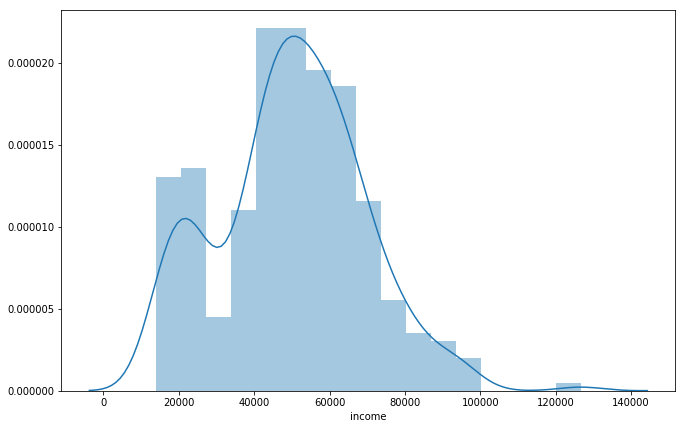

In [8]:
#Python code
sns.distplot(seg_df["income"])

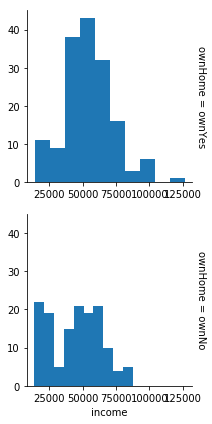

In [9]:
#Check by ownHome 
grid=sns.FacetGrid(seg_df,
                   row='ownHome',
                   margin_titles=True)
grid.map(plt.hist, "income")

#### T-test: is Home ownership overall related to differences in income across all segments?
$H_{0}:$ the means of income between $ownHome == 0$ and $ownHome == 1$ are the same.

<font color=red>R code</font>: *Perform T-test*
<br>$t.test(income \sim ownHome,\,data=seg{\_}df)$

In [12]:
#Python code
ownHomeY=seg_df[seg_df["ownHome"]=="ownYes"]
ownHomeN=seg_df[seg_df["ownHome"]=="ownNo"]
scipy.stats.ttest_ind(ownHomeY["income"],
                      ownHomeN["income"],
                      equal_var=False)

Ttest_indResult(statistic=4.491671542309504, pvalue=1.0231418517244394e-05)

<font color=orange>**Let's do some interpretation**</font>:
<br>P-value << 5%, we can reject the null hypothesis of no difference in income by Home ownership. 

In [13]:
#Check for differences within the segment travelers
scipy.stats.ttest_ind(ownHomeY[ownHomeY["Segment"]=="Travelers"]["income"],
                      ownHomeN[ownHomeN["Segment"]=="Travelers"]["income"],
                      equal_var=False)

Ttest_indResult(statistic=-1.1712414149227623, pvalue=0.2463145733291851)

<font color=orange>**Let's do some interpretation**</font>:
<br>P-value >> 5%, hence we cannot reject the null hypothesis, there is not significant difference in our data in mean income among those Travelers who own homes and who don't.

<font color=green>**Cracking the code**</font>: **scipy.stats.ttest_ind**
<br>Calculate the T-test for the means of two independent samples of scores.
<br>**Syntax**: $scipy.stats.ttest{\_}ind(a,b)$
<br>**Reference**: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

## STEP 5: Testing Multiple Group Means: ANOVA

<font color=blue>**The Maths behind it**</font>: **ANOVA test**
<br>An ANOVA compares the means of multiple groups. Basically, it tests groups to check whether or not there are significant differences between them.
<br>Several types of ANOVA:
- One-way ANOVA: one factor (e.g. smoking status). Extension of t-test to 3 or more samples
- Two-way ANOVA: two factors (e.g. gender and smoking status)
- Three-way (higher factor) ANOVA: three or more factors (e.g. gender, smoking status, beer consumption)

We have the following null and alternative hypothesis for this test.
$$H_{0}: The\,means\,of\,all\,the\,groups\,are\,equa\,(no\,difference)$$
$$H_{a}: The\,mean\,of\,at\,least\,one\,group\,is\,different$$

*To go further*: http://www-hsc.usc.edu/~eckel/biostat2/notes/notes7.pdf or http://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/anova/

<font color=red>R code</font>: *ANOVA*
<br>$seg{\_}aov{\_own}<-aov(income \sim ownHome,\,data=seg{\_}df)$
<br>$anova(seg{\_}aov{\_own})$

In [15]:
#Python code
#Step 1: define the model
mod=ols('income ~ ownHome',
        data=seg_df).fit()

In [16]:
#Step 2 : Compute anova
aov_table=sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df          F    PR(>F)
ownHome   7.162816e+09    1.0  20.320463  0.000009
Residual  1.050428e+11  298.0        NaN       NaN


<font color=orange>**Let's do some interpretation**</font>:
<br>$Pr(>F)$ for *ownHome* is the p-value. In this case, $Pr(>F)<<$5%, hence there is significant variation in income between those who do and those who don't own an home.

<font color=green>**Cracking the code**</font>: **statsmodels.formula.api.ols**
<br>Fit an OLS model.
<br>**Syntax**: $statsmodels.formula.api.ols(formula, data)$
<br>**Reference**: http://www.statsmodels.org/dev/example_formulas.html

<font color=green>**Cracking the code**</font>: **statsmodels.stats.anova_lm**
<br>ANOVA table for one or more fitted linear models.
<br>**Syntax**: $statsmodels.stats.anova{\_}lm(fitted{\_}linear{\_}model)$
<br>**Reference**: http://www.statsmodels.org/dev/generated/statsmodels.stats.anova.anova_lm.html 

In [17]:
#What happens when selecting both Segment and ownHome?
#Define the model
mod1=ols('income ~ Segment + ownHome',
        data=seg_df).fit()
#Compute anova
aov_table1=sm.stats.anova_lm(mod1, typ=2)
print(aov_table1)

                sum_sq     df          F        PR(>F)
Segment   4.794625e+10    3.0  82.574339  8.276268e-39
ownHome   5.685289e+07    1.0   0.293741  5.882424e-01
Residual  5.709660e+10  295.0        NaN           NaN


<font color=orange>**Let's do some interpretation**</font>:
<br>$Pr(>F)$ for *Segment* is <<5%, hence it is a significant predictor. However, $Pr(>F)$ for *ownHome* is >>5%, hence home ownership is not a significant predictor. In fact, home ownership and segment are not independent, and the effect is captured sufficiently by segment membership alone. Is it possible that Home ownership is related to income in some segments and not in others? To test this, we need to integrate *interaction effects*

In [18]:
#Python code: interaction effect between segment and ownHome
mod2=ols('income ~ Segment * ownHome',
        data=seg_df).fit()
#Compute anova
aov_table2=sm.stats.anova_lm(mod2, typ=2)
print(aov_table2) 

                       sum_sq     df          F        PR(>F)
Segment          4.794625e+10    3.0  82.186182  1.424678e-38
ownHome          5.685289e+07    1.0   0.292360  5.891243e-01
Segment:ownHome  3.137242e+08    3.0   0.537765  6.567618e-01
Residual         5.678288e+10  292.0        NaN           NaN


<font color=orange>**Let's do some interpretation**</font>:
<br>Once again segment is a significant predictor while ownHome and the interaction parameters are not significant. Segment membership is the best predictor on its own.

#### Visualizing Group Confidence Intervals

<font color=red>R code</font>: *Group Confidence Interval*
<br>$seg{\_}aov<-aov(income \sim -1 + Segment,\,data=seg{\_}df)$
<br>$glht(seg{\_}aov)$

       Multiple Comparison of Means - Tukey HSD,FWER=0.05       
  group1     group2     meandiff     lower       upper    reject
----------------------------------------------------------------
Moving up  Suburb mix  6203.0392    607.9511   11798.1273  True 
Moving up  Travelers   10359.9245  4483.9067   16235.9424  True 
Moving up  Urban hip  -29195.4027  -35843.358 -22547.4474  True 
Suburb mix Travelers   4156.8853   -1228.574   9542.3446  False 
Suburb mix Urban hip   -35398.442 -41617.0347 -29179.8492  True 
Travelers  Urban hip  -39555.3273 -46027.8438 -33082.8107  True 
----------------------------------------------------------------


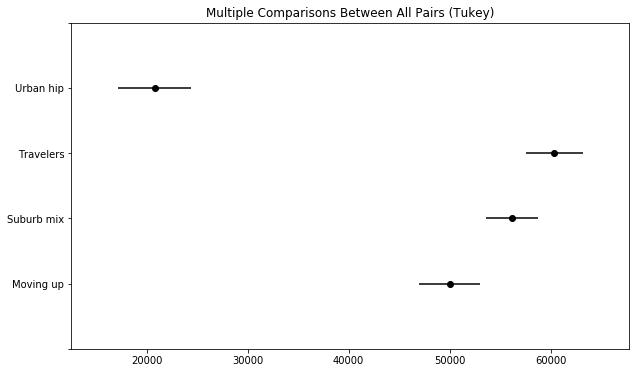

In [20]:
#Python plot
#Visualizing group confidence intervals
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=seg_df["income"],     # Data
                          groups=seg_df["Segment"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
print(tukey.summary())       # See test summary

<font color=green>**Cracking the code**</font>: **statsmodels.stats.multicomp.pairwise_tukeyhsd**
<br>Caclulate all pairwise comparisons with TukeyHSD confidence intervals.
<br>**Syntax**: $statsmodels.stats.multicomp.pairwise{\_}tukeyhsd(endog=data,\,groups=groups,\,alpha=confidence{\_}interval)$
<br>**Reference**: http://www.statsmodels.org/dev/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html